In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Data Science\iNeuron\ML\Regression\Data Science Salaries\data\Latest_Data_Science_Salaries.csv")

In [3]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [4]:
df.shape

(3300, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [6]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [7]:
df = df.drop(['Job Title', 'Salary', 'Salary Currency'], axis=1)

In [8]:
df['Working Site'] = ['Yes' if i else 'No' for i in df['Company Location'] == df['Employee Residence']]
df['Working Site'].unique()
df = df.drop(['Company Location', 'Employee Residence'], axis=1)

In [9]:
categorical_cols = df.columns[df.dtypes == "object"]
numerical_cols = df.columns[df.dtypes != "object"]
# Another method
# cat1 = df.select_dtypes(include='object').columns
# num1 = df.select_dtypes(exclude='object').columns

In [10]:
df[numerical_cols].describe()

,Salary in USD,Year
count,3300.000000,3300.000000
mean,142095.983939,2022.495455
std,69028.235512,0.716355
min,15000.000000,2020.000000
25%,90000.000000,2022.000000
50%,136000.000000,2023.000000
75%,185000.000000,2023.000000
max,450000.000000,2023.000000


In [11]:
df[categorical_cols].describe()

,Employment Type,Experience Level,Expertise Level,Company Size,Working Site
count,3300,3300,3300,3300,3300
unique,4,4,4,3,2
top,Full-Time,Senior,Expert,Medium,Yes
freq,3261,2065,2065,2707,3197


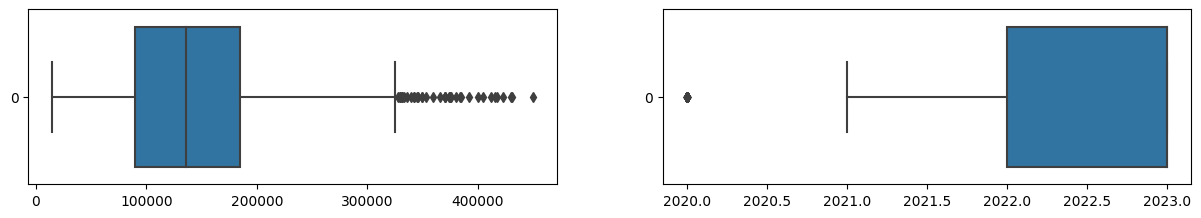

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col], orient='h')

plt.show()

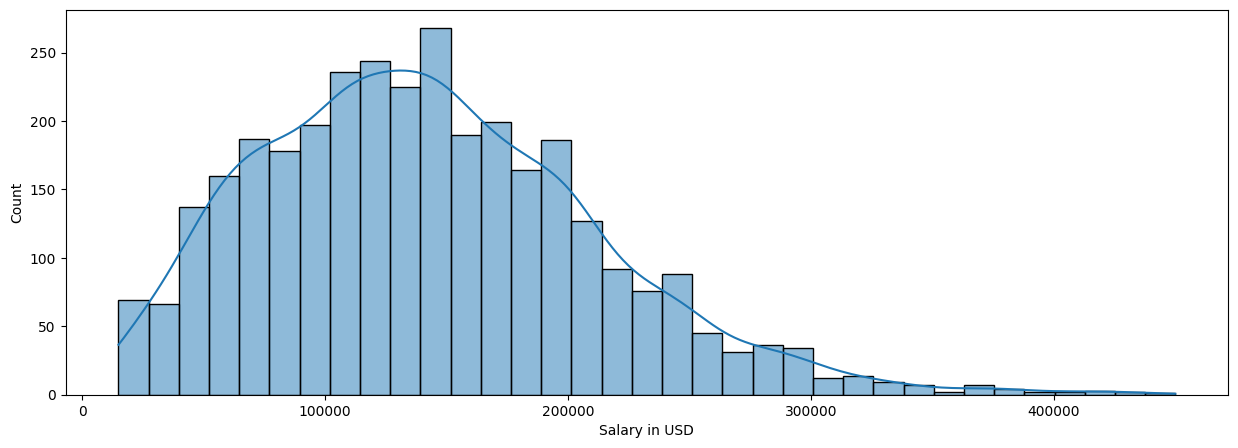

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(df['Salary in USD'], kde=True)
plt.show()

<Axes: >

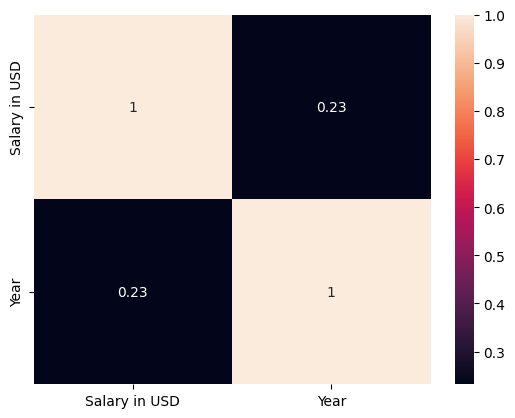

In [14]:
sns.heatmap(df[numerical_cols].corr(),annot=True)

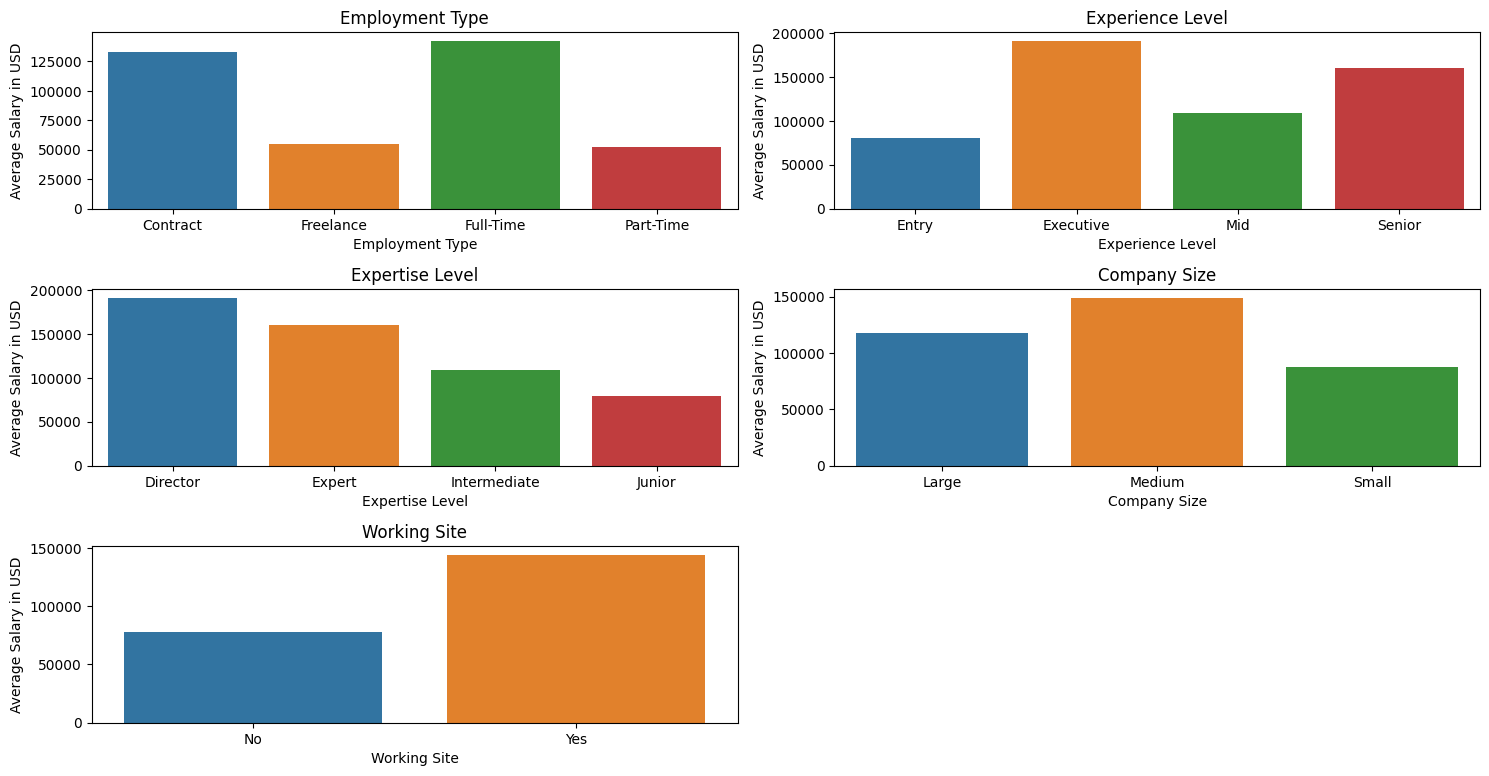

In [15]:
plt.figure(figsize=(15,10))

for i,col in enumerate(categorical_cols):
    result = df.groupby(col)['Salary in USD'].mean()
    plt.subplot(4,2,i+1)
    plt.title(col)
    plt.ylabel("Average Salary in USD")
    sns.barplot(x=result.index, y=result.values)

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

Employment_Type_cat = ['Part-Time', 'Freelance', 'Contract', 'Full-Time']
Experience_Level_cat = ['Entry', 'Mid', 'Senior', 'Executive']
Expertise_Level_cat = ['Junior', 'Intermediate', 'Expert', 'Director'] 
Company_Size_cat = ['Small', 'Large', 'Medium']
Working_Site_cat = ['No', 'Yes']

enc = OrdinalEncoder(categories=[Employment_Type_cat, Experience_Level_cat, Expertise_Level_cat, Company_Size_cat, Working_Site_cat])

In [17]:
enc.fit(df[categorical_cols])

OrdinalEncoder(categories=[['Part-Time', 'Freelance', 'Contract', 'Full-Time'],
                           ['Entry', 'Mid', 'Senior', 'Executive'],
                           ['Junior', 'Intermediate', 'Expert', 'Director'],
                           ['Small', 'Large', 'Medium'], ['No', 'Yes']])

In [18]:
df.head()

,Employment Type,Experience Level,Expertise Level,Salary in USD,Company Size,Year,Working Site
0,Full-Time,Senior,Expert,210000,Medium,2023,Yes
1,Full-Time,Senior,Expert,165000,Medium,2023,Yes
2,Full-Time,Senior,Expert,185900,Medium,2023,Yes
3,Full-Time,Senior,Expert,129300,Medium,2023,Yes
4,Full-Time,Senior,Expert,140000,Medium,2023,Yes


In [19]:
df[categorical_cols] = enc.transform(df[categorical_cols])

In [20]:
df.head()

,Employment Type,Experience Level,Expertise Level,Salary in USD,Company Size,Year,Working Site
0,3.0,2.0,2.0,210000,2.0,2023,1.0
1,3.0,2.0,2.0,165000,2.0,2023,1.0
2,3.0,2.0,2.0,185900,2.0,2023,1.0
3,3.0,2.0,2.0,129300,2.0,2023,1.0
4,3.0,2.0,2.0,140000,2.0,2023,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employment Type   3300 non-null   float64
 1   Experience Level  3300 non-null   float64
 2   Expertise Level   3300 non-null   float64
 3   Salary in USD     3300 non-null   int64  
 4   Company Size      3300 non-null   float64
 5   Year              3300 non-null   int64  
 6   Working Site      3300 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 180.6 KB


In [22]:
df.describe()

,Employment Type,Experience Level,Expertise Level,Salary in USD,Company Size,Year,Working Site
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,2.976970,1.625758,1.625758,142095.983939,1.774545,2022.495455,0.968788
std,0.229824,0.706959,0.706959,69028.235512,0.515966,0.716355,0.173917
min,0.000000,0.000000,0.000000,15000.000000,0.000000,2020.000000,0.000000
25%,3.000000,1.000000,1.000000,90000.000000,2.000000,2022.000000,1.000000
50%,3.000000,2.000000,2.000000,136000.000000,2.000000,2023.000000,1.000000
75%,3.000000,2.000000,2.000000,185000.000000,2.000000,2023.000000,1.000000
max,3.000000,3.000000,3.000000,450000.000000,2.000000,2023.000000,1.000000


<Axes: >

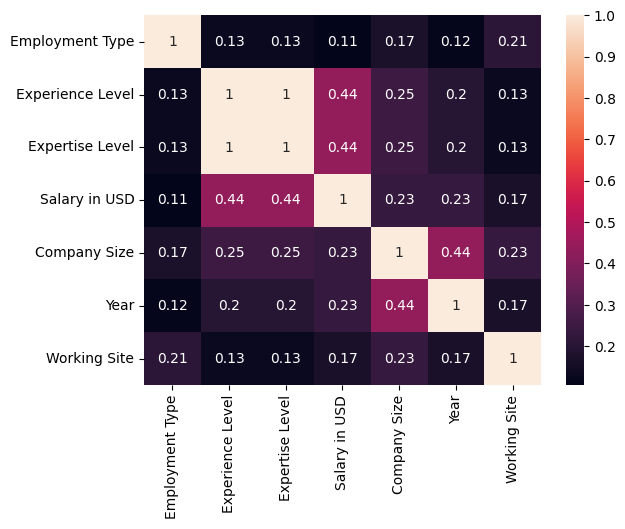

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
df['Year'].value_counts()

Year
2023    1996
2022    1016
2021     215
2020      73
Name: count, dtype: int64

In [25]:
df.groupby('Year')['Salary in USD'].mean()

Year
2020    103069.342466
2021     99266.409302
2022    131361.595472
2023    153600.714429
Name: Salary in USD, dtype: float64